## Linear Regression

Linear Regression is a foundational supervised learning algorithm used to predict a continuous target variable based on one or more features. It models the relationship as a linear equation:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$$

The goal is to find the optimal coefficients ($\beta$) that minimize the sum of squared differences between the actual values ($Y$) and the predicted values ($\hat{Y}$), a method known as Ordinary Least Squares (OLS).

### Predicting Points Per Game

Our goal is to build a Linear Regression model to predict a player's **Points Per Game (`pts`)**. This is a classic regression task where we use other player statistics to estimate their scoring output. We will use the `all_seasons.csv` dataset.

We will use the following libraries:

1. matplotlib (https://matplotlib.org/)
2. numpy (https://numpy.org/)
3. pandas (https://pandas.pydata.org/)
4. seaborn (https://seaborn.pydata.org/)
5. scikit learn (https://scikit-learn.org/)

Start by importing them, and then loading our dataset:

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('talk')

In [34]:
df = pd.read_csv('all_seasons.csv')
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


Now define our features and narrow down the data that we will be using:

In [35]:
y = df['pts']
features = ['age', 'gp', 'reb', 'ast', 'net_rating', 'usg_pct', 'ts_pct']
X = df[features]

Now we want to normalize the values:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training the Model and Evaluation

Now that we have set up our data, we will train our model, and then evaluate its accuracy.

In [37]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

Using the model, we will make some predictions.

In [38]:
y_pred = lin_reg.predict(X_test_scaled)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('R-squared (R2):', metrics.r2_score(y_test, y_pred))


Mean Absolute Error (MAE): 1.9017076738099108
Mean Squared Error (MSE): 6.512204028461845
R-squared (R2): 0.8222449358093388


Our R-squared value is close to 1, which is a good sign, suggesting there is a clear relationship between our selected statistics and points per game.

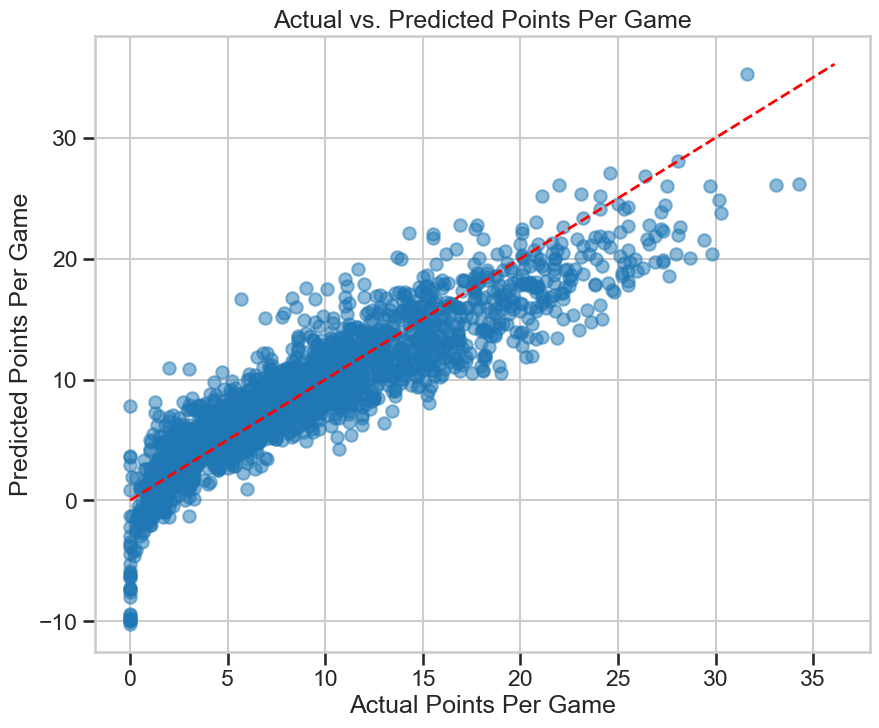

In [39]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2) # 45-degree line
plt.xlabel('Actual Points Per Game')
plt.ylabel('Predicted Points Per Game')
plt.title('Actual vs. Predicted Points Per Game')
plt.show()

The graph is promising, as our model shows a clear linear trend between our predicted and actual points per game.

We can further evaluate the accuracy by doing a Residual analysis.

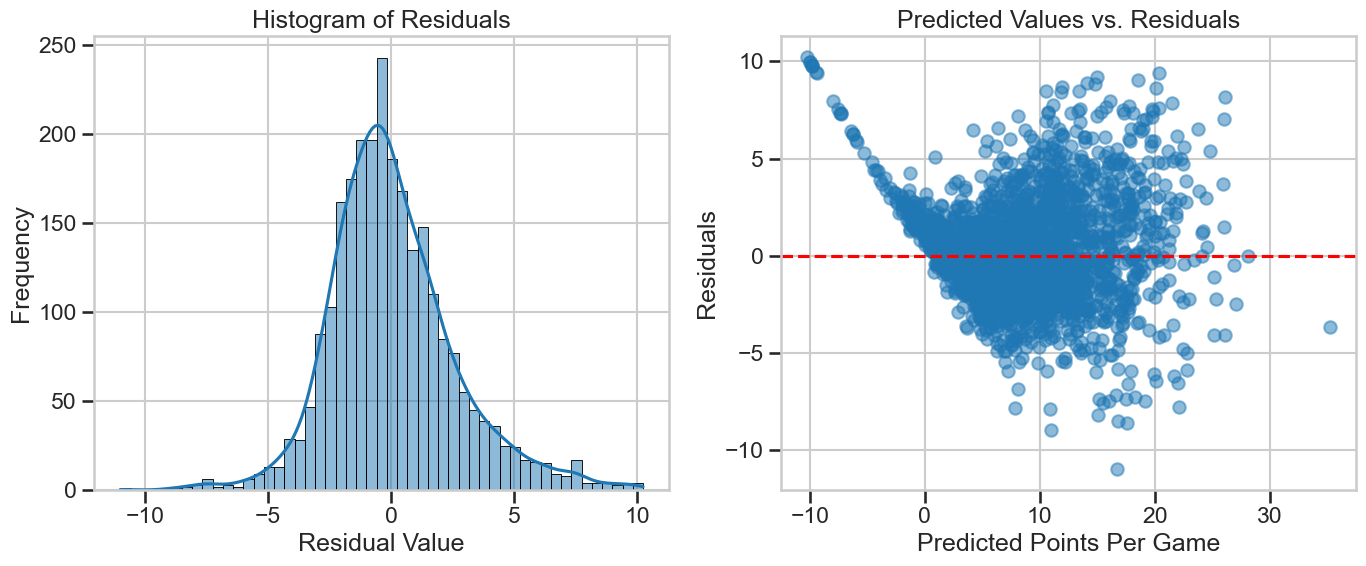

In [40]:
residuals = y_test - y_pred

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicted Values vs. Residuals')
plt.xlabel('Predicted Points Per Game')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

The histogram follows a bell curve, meaning we have normally distributed errors and suggests our model is fairly accurate. Similarly, the scatter plot shows that the points are mostly scatted around the x-axis. Both of these suggest relative accuracy, though show slight peaks in errors that dock points in the model's complete accuracy.

### Which feature is most important for our predictions?

Since we chose a lot of features, it would be nice to see which is most significant in predicting a player's points per game. We can analyze coefficients to better see which of the stats are most important.

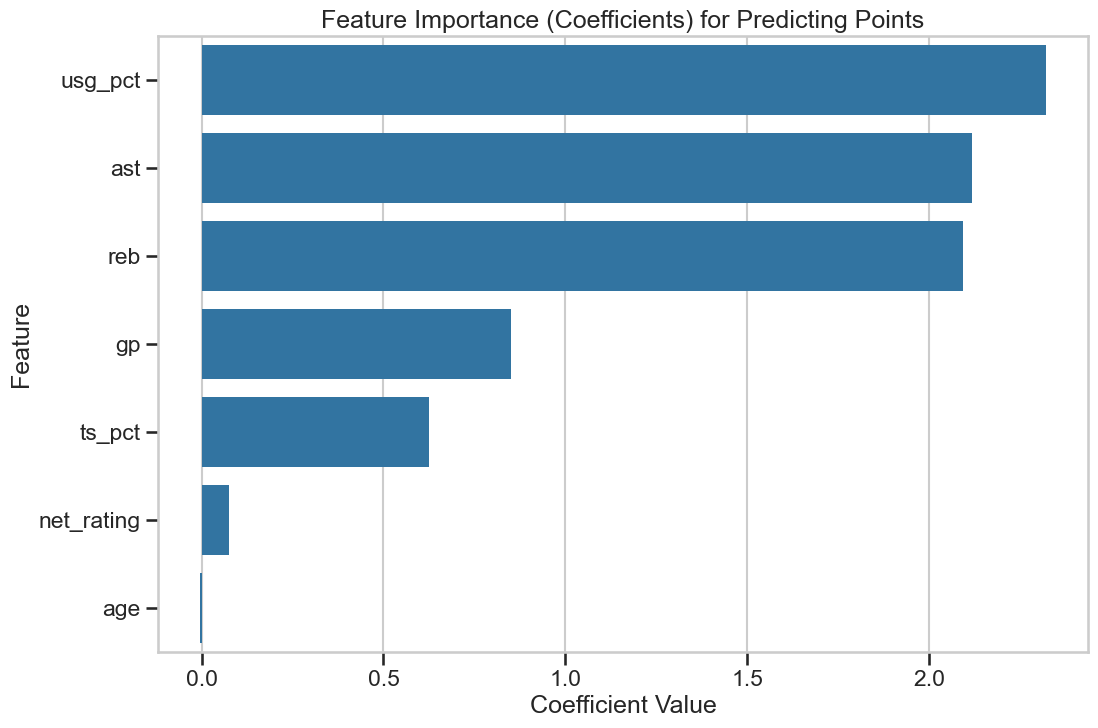

In [41]:
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Feature Importance (Coefficients) for Predicting Points')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

Intuitively, this mostly makes sense. Usage rate is, in simple terms, how often a player touches the ball, so it makes sense that higher frequency in ball posession leads to high points per game. Similarly, assists and rebounds are also a per-game statistic, which generally are also associated with play time and usage rate. 

Games played is an interesting one, as intuitively it doesn't seem like it should factor into points per game. However, games played could possibly factor into play time per game. If a player is playing high minutes every game they play in, then it's assumed they are relatively important to the team and will play a high quantity of games in general. Of course, injuries and other external circumstances can throw this off, which explain why it is less impactful than our former three statistics.

Regarding true shooting percentage, this can simply be a product of more efficient scorers simply being allowed to score more often. This is somewhat similar to net rating, although net rating also takes into account a player's defensive capabilities, which has nothing to do with scoring the ball, and hence makes net rating less important of a metric.

Age is, understandably, barely impactful at all. This makes sense, as there are a plethora of players on both ends of the age spectrum scoring all sorts of point totals, to the point where it almost doesn't matter.

### Conclusion

Overall, the linear regression model does a good job of predicting an NBA player's points per game average using several basic statistics in combination, though mostly utilizes play time related statistics to make that prediction